In [4]:
import pandas as pd
import seaborn as sns
import zipfile


# open the csv file in the dataset
with open("/mnt/hdd18.2t/sea120424/exchange/ML/datasets/project/PregnancyData.csv") as f:
 # read the dataset
  df = pd.read_csv(f, low_memory=False)

In [5]:
df

,Patient Age at Treatment,Date patient started trying to become pregnant OR date of last pregnancy,"Total Number of Previous cycles, Both IVF and DI","Total Number of Previous treatments, Both IVF and DI at clinic",Total Number of Previous IVF cycles,Total Number of Previous DI cycles,"Total number of previous pregnancies, Both IVF and DI",Total number of IVF pregnancies,Total number of DI pregnancies,Total number of live births - conceived through IVF or DI,...,Heart Three Birth Weight,Heart Three Sex,Heart Three Delivery Date,Heart Three Birth Congenital Abnormalities,Heart Four Weeks Gestation,Heart Four Birth Outcome,Heart Four Birth Weight,Heart Four Sex,Heart Four Delivery Date,Heart Four Birth Congenital Abnormalities
0,40-42,NaN,2,2,2,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,45-50,NaN,3,3,3,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,35-37,NaN,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18 - 34,NaN,2,2,2,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18 - 34,NaN,5,5,5,0,1,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158514,18 - 34,NaN,3,3,0,3,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158515,38-39,NaN,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158516,38-39,NaN,1,1,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158517,18 - 34,NaN,2,0,0,2,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

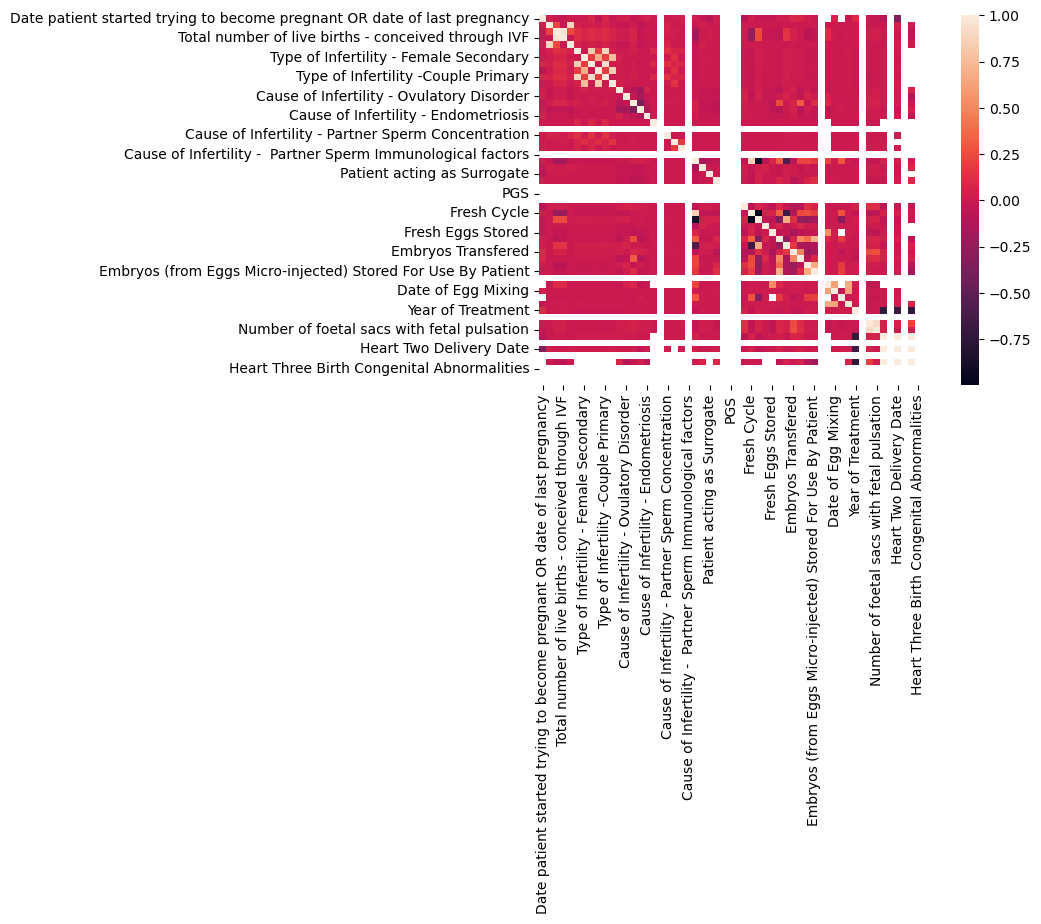

In [6]:
sns.heatmap(df.corr())

In [7]:
# Getting the list of columns
col = df.columns
  
# Printing Number of columns
print('Number of columns :', len(col))

# Delete columns containing either 6% or more than 6% NaN Values
perc = 6.0
min_count = int(((100-perc)/100)*df.shape[0] + 1)
mod_df = df.dropna( axis=1, thresh=min_count, how = 'any')
col_mod = mod_df.columns

print('Number of columns :', len(col_mod))
print(mod_df.columns)

Number of columns : 95
Number of columns : 35
Index(['Patient Age at Treatment',
       'Total Number of Previous cycles, Both IVF and DI',
       'Total Number of Previous treatments, Both IVF and DI at clinic',
       'Total Number of Previous IVF cycles',
       'Total Number of Previous DI cycles',
       'Total number of previous pregnancies, Both IVF and DI',
       'Total number of IVF pregnancies', 'Total number of DI pregnancies',
       'Total number of live births - conceived through IVF or DI',
       'Total number of live births - conceived through IVF',
       'Total number of live births - conceived through DI',
       'Type of Infertility - Female Primary',
       'Type of Infertility - Female Secondary',
       'Type of Infertility - Male Primary',
       'Type of Infertility - Male Secondary',
       'Type of Infertility -Couple Primary',
       'Type of Infertility -Couple Secondary',
       'Cause  of Infertility - Tubal disease',
       'Cause of Infertility - Ovul

In [8]:
mod_df['Embryos Transfered'] = df['Embryos Transfered']

/tmp/ipykernel_2830/4167085505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod_df['Embryos Transfered'] = df['Embryos Transfered']


In [9]:
mod_df['Embryos Transfered']

0         1.0
1         2.0
2         0.0
3         1.0
4         2.0
         ... 
158514    NaN
158515    NaN
158516    NaN
158517    NaN
158518    NaN
Name: Embryos Transfered, Length: 158519, dtype: float64

In [11]:
mod_df.shape

(158519, 36)

In [12]:
mod_df.drop('Total Number of Previous cycles, Both IVF and DI', axis=1, inplace = True)
mod_df.drop('Total Number of Previous treatments, Both IVF and DI at clinic', axis=1, inplace = True)
mod_df.drop('Total Number of Previous DI cycles', axis=1, inplace = True)
mod_df.drop('Total number of previous pregnancies, Both IVF and DI', axis=1, inplace = True)
mod_df.drop('Total number of DI pregnancies', axis=1, inplace = True)
mod_df.drop('Total number of live births - conceived through IVF or DI', axis=1, inplace = True)
mod_df.drop('Total number of live births - conceived through DI', axis=1, inplace = True)
mod_df.drop('Type of treatment - IVF or DI', axis=1, inplace = True)
mod_df.drop('Year of Treatment', axis=1, inplace = True)

/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [36]:
print(mod_df.shape)
feature_list = mod_df.columns.tolist()

# all feature
print(feature_list, feature_list[-3])

# mod_df[mod_df.columns[0]].values.tolist()
MaleSecondary =  list(mod_df[feature_list[7]])
CouplePrimary =  list(mod_df[feature_list[8]])
CoupleSecondary =  list(mod_df[feature_list[9]])
TubalDisease =  list(mod_df[feature_list[10]])
OvulatoryDisorder =  list(mod_df[feature_list[11]])
MaleFactor =  list(mod_df[feature_list[12]])
PatientUnexplained =  list(mod_df[feature_list[13]])
NumberOfLiveBirth = list(mod_df[feature_list[-3]])

mod_df.describe()

(158519, 27)
['Patient Age at Treatment', 'Total Number of Previous IVF cycles', 'Total number of IVF pregnancies', 'Total number of live births - conceived through IVF', 'Type of Infertility - Female Primary', 'Type of Infertility - Female Secondary', 'Type of Infertility - Male Primary', 'Type of Infertility - Male Secondary', 'Type of Infertility -Couple Primary', 'Type of Infertility -Couple Secondary', 'Cause  of Infertility - Tubal disease', 'Cause of Infertility - Ovulatory Disorder', 'Cause of Infertility - Male Factor', 'Cause of Infertility - Patient Unexplained', 'Cause of Infertility - Endometriosis', 'Cause of Infertility - Cervical factors', 'Cause of Infertility - Female Factors', 'Cause of Infertility - Partner Sperm Concentration', 'Cause of Infertility -  Partner Sperm Morphology', 'Causes of Infertility - Partner Sperm Motility', 'Cause of Infertility -  Partner Sperm Immunological factors', 'Stimulation used', 'Specific treatment type', 'Sperm From', 'Number of Live

,Total number of live births - conceived through IVF,Type of Infertility - Female Primary,Type of Infertility - Female Secondary,Type of Infertility - Male Primary,Type of Infertility - Male Secondary,Type of Infertility -Couple Primary,Type of Infertility -Couple Secondary,Cause of Infertility - Tubal disease,Cause of Infertility - Ovulatory Disorder,Cause of Infertility - Male Factor,...,Cause of Infertility - Cervical factors,Cause of Infertility - Female Factors,Cause of Infertility - Partner Sperm Concentration,Cause of Infertility - Partner Sperm Morphology,Causes of Infertility - Partner Sperm Motility,Cause of Infertility - Partner Sperm Immunological factors,Stimulation used,Number of Live Births,Number of foetal sacs with fetal pulsation,Embryos Transfered
count,158519.000000,158519.000000,158519.000000,158519.000000,158519.000000,158519.000000,158519.000000,158519.000000,158519.000000,158519.000000,...,158519.000000,158519.0,158519.000000,158519.000000,158519.000000,158519.0,158519.000000,158519.000000,158519.000000,148106.000000
mean,0.126389,0.003501,0.001438,0.003274,0.001438,0.003722,0.001022,0.103577,0.112725,0.332906,...,0.000025,0.0,0.000120,0.000069,0.000019,0.0,0.666564,0.268876,0.311603,1.144991
std,0.355476,0.059067,0.037898,0.057126,0.037898,0.060894,0.031952,0.304713,0.316257,0.471255,...,0.005023,0.0,0.010947,0.008330,0.004350,0.0,0.471442,0.504899,0.546304,0.767844
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000,2.000000
max,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,4.000000,40.000000,3.000000


158519

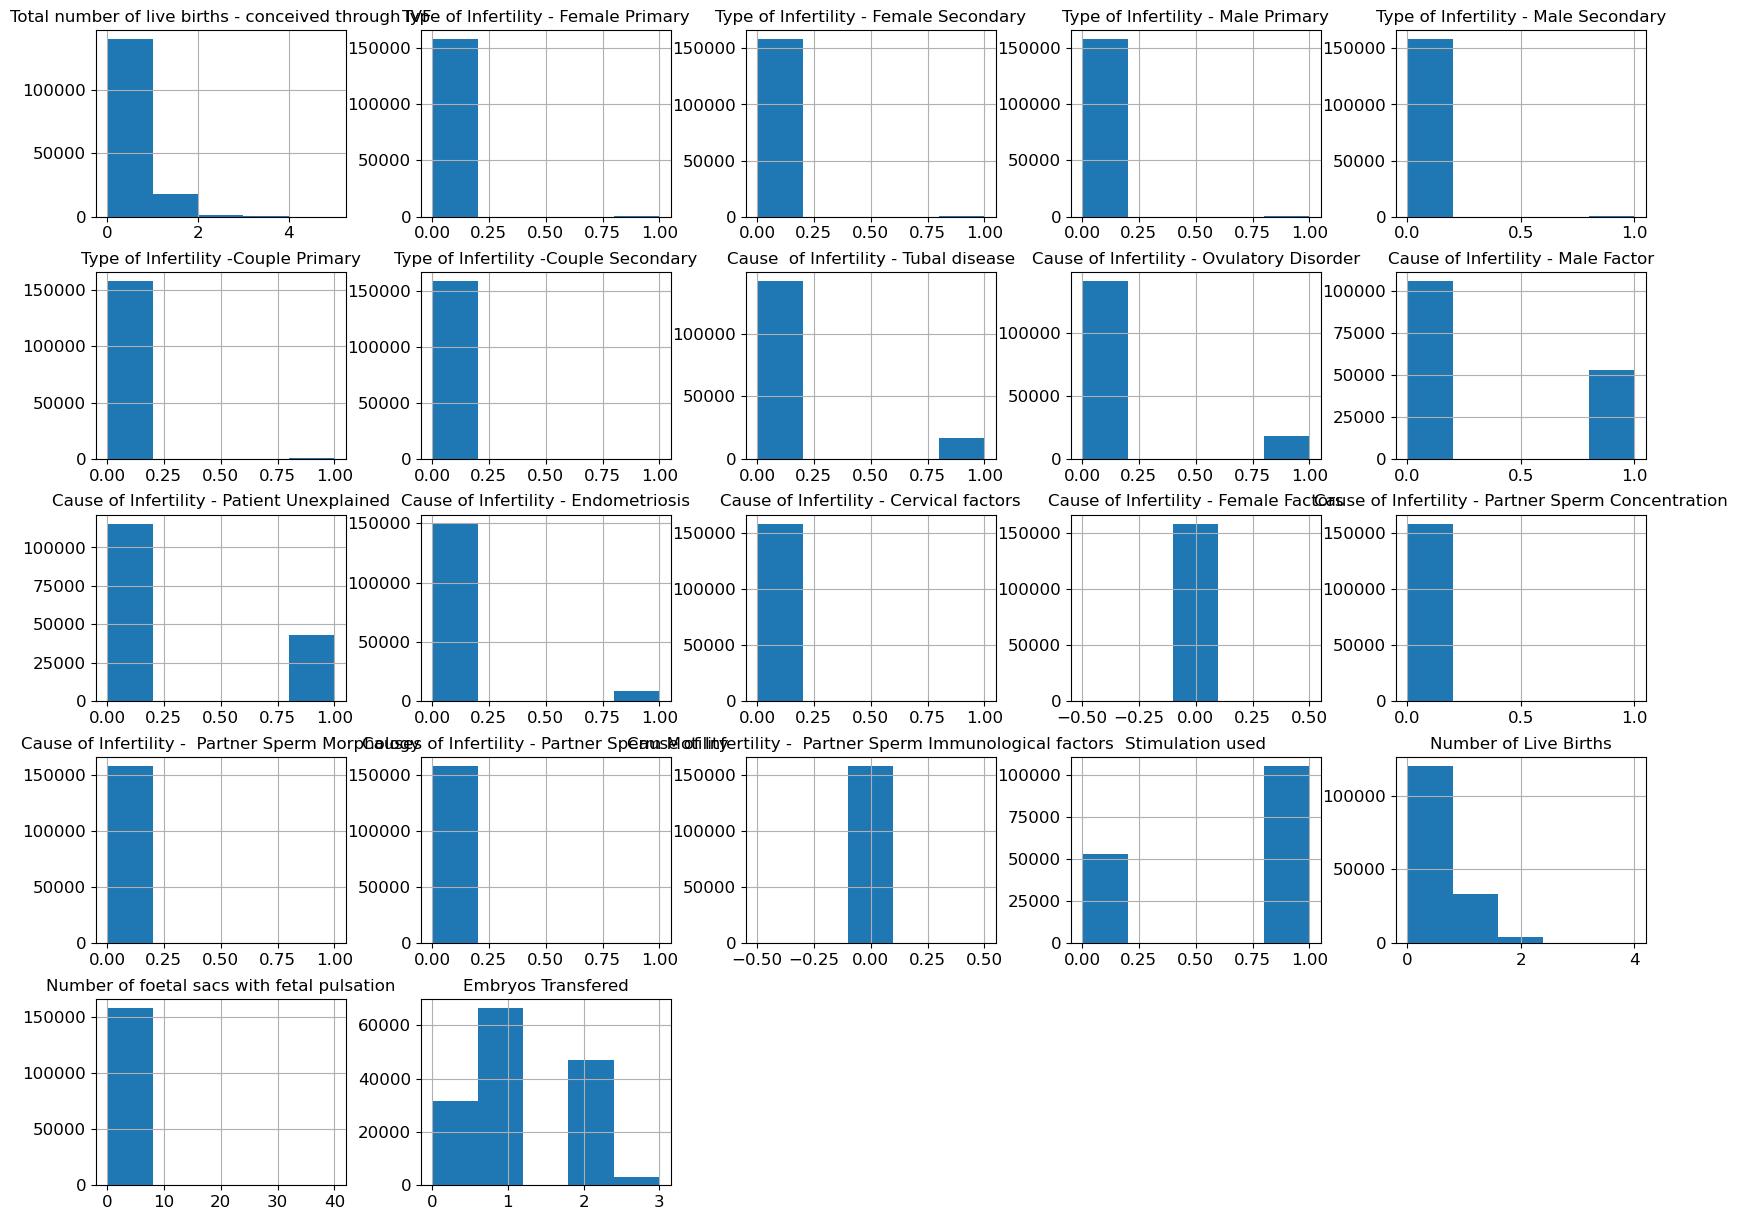

In [40]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

mod_df.hist(bins=5, figsize=(20,15))
plt.show()

<AxesSubplot:xlabel='Cause of Infertility - Patient Unexplained', ylabel='Number of Live Births'>

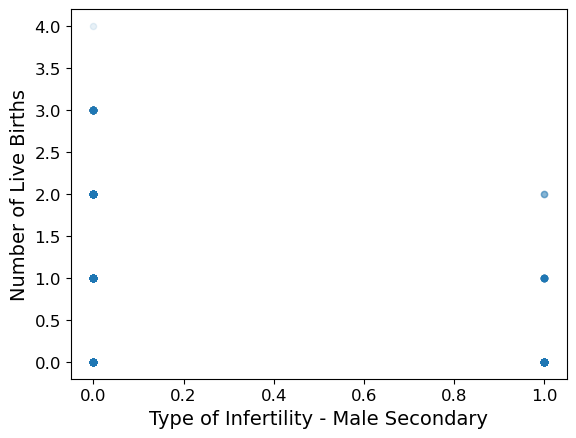

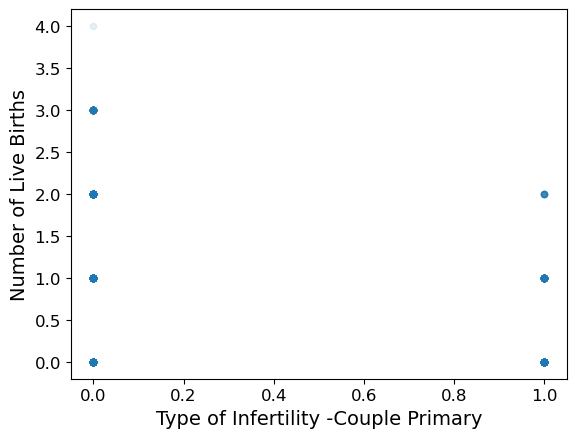

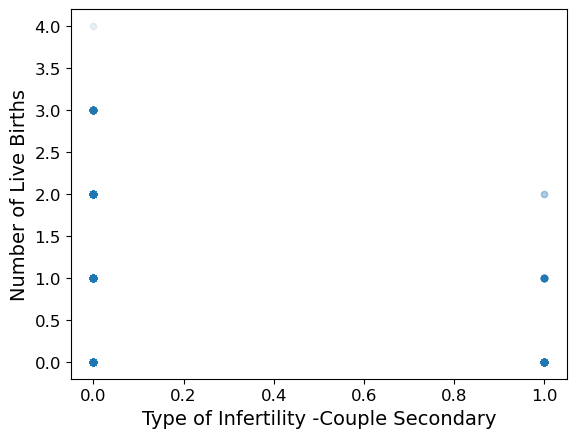

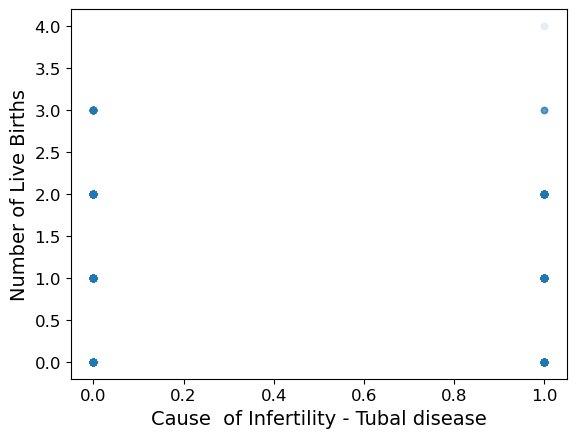

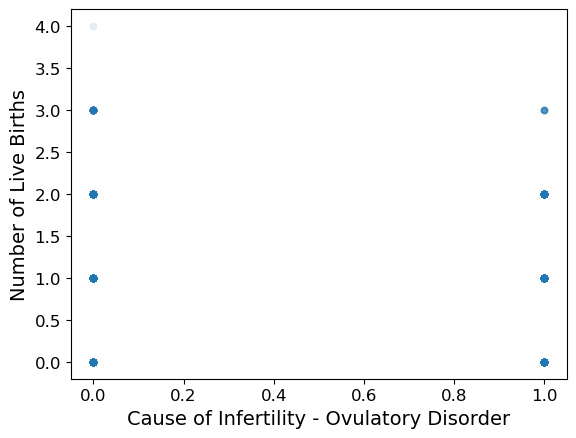

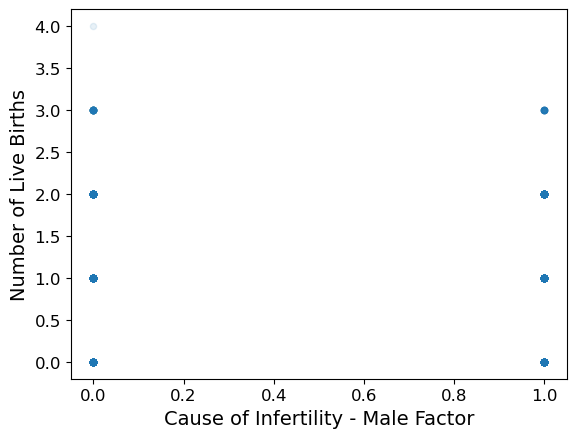

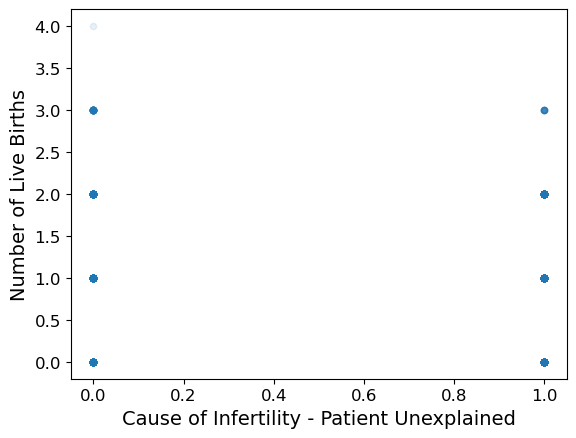

In [61]:
mod_df.plot(kind="scatter", x=feature_list[7], y="Number of Live Births", alpha=0.1)
mod_df.plot(kind="scatter", x=feature_list[8], y="Number of Live Births", alpha=0.1)
mod_df.plot(kind="scatter", x=feature_list[9], y="Number of Live Births", alpha=0.1)
mod_df.plot(kind="scatter", x=feature_list[10], y="Number of Live Births", alpha=0.1)
mod_df.plot(kind="scatter", x=feature_list[11], y="Number of Live Births", alpha=0.1)
mod_df.plot(kind="scatter", x=feature_list[12], y="Number of Live Births", alpha=0.1)
mod_df.plot(kind="scatter", x=feature_list[13], y="Number of Live Births", alpha=0.1)

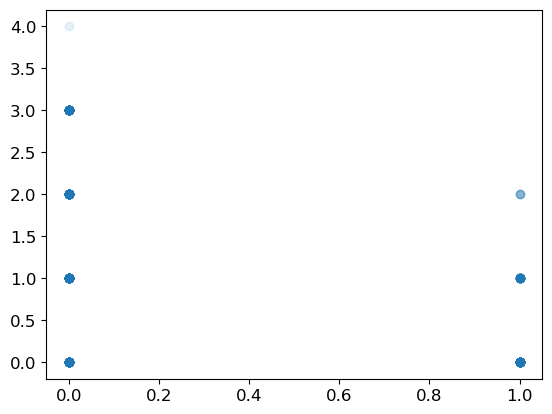

In [57]:
MaleSecondary
NumberOfLiveBirth
plt.scatter(x = MaleSecondary, y = NumberOfLiveBirth, alpha=0.1)